<a href="https://colab.research.google.com/github/anniepeacock/DANSAR/blob/devel/Sample_Products_NISAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# NISAR Sample Products

### Link to Sample Products: https://nisar.jpl.nasa.gov/data/sample-data/

The content of this notebook is as follows:
1. [Running the Notebook](#s1)
2. [L2 GSLC	Level 2 Focused SAR image in geocoded coordinates](#s2)
3. [L2 GUNW	Level 2 phase-unwrapped interferogram in geocoded coordinates](#s3)
4. [L2 GOFF	Level 2 pixel offsets in geocoded coordinates](#s4)
5. [L2 GCOV	Level 2 SAR covariance product in geocoded coordinates](#s5)
6. [L3 SM	Level 3 Global Soil Moisture Product](#s6)


<a name="s1"></a>
## 1. Running the Notebook

- This Notebook has both "text" and "code" cells. The text cells have text descriptions about running the notebooks and data interpretation.
- Code cells are a light gray and a "play" button appears in the upper left corner when your mouse is hovered over the cell.
- To run the content in the code cells, **select the play button** in the upper left corner of each code cell or **press shift-enter**.

### Install Python Packages
This routine uses several python libaries. Some are already included in the Google Colab environment and others are installed and imported in the cell below. Downloading new python packages to this environment may take a few seconds to complete.

In [2]:
!pip install rasterio --quiet
!pip install geopandas --quiet

import rasterio as rio                      # Read and write geospatial raster data
from rasterio.plot import plotting_extent   # Returns plotting extent in format needed
import matplotlib.pyplot as plt             # Plotting, making graphs
import geopandas as gpd                     # Visualizing and importing geodata frames
import numpy as np                          # Numeric and mathematic functions
import math                                 # Access to mathematical functions
import getpass
import os
from osgeo import gdal
import glob

import h5py

##### Install GDAL dependencies to Google Colab

In [3]:
!%%shell
!yes | add-apt-repository ppa:ubuntugis/ppa
!apt-get update
!apt-get install gdal-bin libgdal-dev
!C_INCLUDE_PATH=/usr/include/gdal CPLUS_INCLUDE_PATH=/usr/include/gdal python -m pip install GDAL=="$(gdal-config --version)"

/bin/bash: line 1: fg: no job control
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu/ jammy main'
Description:
Official stable UbuntuGIS packages.


More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Adding repository.
Found existing deb entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding deb entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Found existing deb-src entry in /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/ubuntugis-ubuntu-ppa-jammy.list
Adding key to /etc/apt/trusted.gpg.d/ubuntugis-ubuntu-ppa.gpg with fingerprint 6B827C12C2D425E227EDCA75089EBE08314DF160
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 https://developer

### Download the Data

Fetch UAVSAR geotiffs from the download links below with wget. The original UAVSAR data have been converted to cropped and subset geotiffs over the Station Fire perimeter.


In [4]:
# Enter NASA's Earth data login
username = getpass.getpass(prompt='Earthdata username:')
password = getpass.getpass(prompt='Earthdata password:')

Earthdata username:··········
Earthdata password:··········


In [5]:
# L2 GSLC Level 2 Focused SAR image in geocoded coordinates
!wget --user {username} --password {password} https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/GSLC/ALOS1_Rosamond_20081012/NISAR_L2_PR_GSLC_001_005_A_219_2005_DHDH_A_20081127T060959_20081127T061015_P01101_F_N_J_001.h5
!wget --user {username} --password {password} https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/GSLC/ALOS1_Rosamond_20081127/NISAR_L2_PR_GSLC_001_005_A_219_2005_DHDH_A_20081127T060959_20081127T061015_P01101_F_N_J_001.h5

# L2 GUNW Level 2 phase-unwrapped interferogram in geocoded coordinates
!wget --user {username} --password {password} https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/GUNW/ALOS-1_Rosamond_20081012_20081127/NISAR_L2_PR_GUNW_001_005_A_219_220_4020_SH_20081012T060910_20081012T060926_20081127T060959_20081127T061015_P01101_M_F_J_001.h5

# L2 GOFF Level 2 pixel offsets in geocoded coordinates
!wget --user {username} --password {password} https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/GOFF/ALOS-1_Rosamond_20081012_20081127/NISAR_L2_PR_GOFF_001_005_A_219_220_4020_SH_20081012T060910_20081012T060926_20081127T060959_20081127T061015_P01101_M_F_J_001.h5

# L2 GCOV Level 2 SAR covariance product in geocoded coordinates
!wget --user {username} --password {password} https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/GCOV/ALOS1_Rosamond_20081012/NISAR_L2_PR_GCOV_001_005_A_219_4020_SHNA_A_20081012T060910_20081012T060926_P01101_F_N_J_001.h5

# L3 SM Level 3 Global Soil Moisture Product
!wget --user {username} --password {password} https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/Soil_Moisture/ALOS-2/NISAR_L3_PR_SME2_001_008_D_070_4000_QPNA_A_20190829T180759_20190829T180809_P01101_M_P_J_001.h5

--2024-02-28 22:58:07--  https://nisar.asf.alaska.edu/NISAR-SAMPLE-DATA/GSLC/ALOS1_Rosamond_20081012/NISAR_L2_PR_GSLC_001_005_A_219_2005_DHDH_A_20081127T060959_20081127T061015_P01101_F_N_J_001.h5
Resolving nisar.asf.alaska.edu (nisar.asf.alaska.edu)... 18.65.25.123, 18.65.25.11, 18.65.25.113, ...
Connecting to nisar.asf.alaska.edu (nisar.asf.alaska.edu)|18.65.25.123|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://d1mv8zhcvry6x4.cloudfront.net/s3-7fdfbcb0ce308dc58d08f97acb1f0590/sds-n-cumulus-prod-nisar-sample-data.s3.us-west-2.amazonaws.com/GSLC/ALOS1_Rosamond_20081012/NISAR_L2_PR_GSLC_001_005_A_219_2005_DHDH_A_20081127T060959_20081127T061015_P01101_F_N_J_001.h5?A-userid=None&Expires=1709164687&Signature=HxANMQS9R4n8KgGKWn8KVhNomGRLaqclIDtPSwg39SKoa9b59ymBdWKLAvoQ7dsssXK~Ij4L6~9mA5pi4D93biNFXKUucoFVE2AsJS9E0icHvB6f4bJQpoVztoZp74-L53DGCWIfR-FCjw3mM8SZ7~20BznShsLGuHRaNA45grOOt3Zc0-3uN5Zq48kWBFz7CTcHjk4DYTd-ZfuvJKLEAuVKza700FnsSMppYq~9LtlSoQPfQZg

# 2. L2 GSLC 	Level 2 Focused SAR image in geocoded coordinates


Datasets in LSAR group:
['HH', 'azimuthBandwidth', 'centerFrequency', 'listOfPolarizations', 'numberOfSubSwaths', 'projection', 'rangeBandwidth', 'slantRangeSpacing', 'xCoordinateSpacing', 'xCoordinates', 'yCoordinateSpacing', 'yCoordinates', 'zeroDopplerTimeSpacing']
<HDF5 dataset "HH": shape (24879, 9090), type "<c8">
Data shape: (24879, 9090)


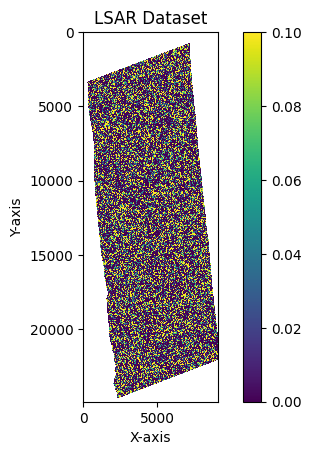

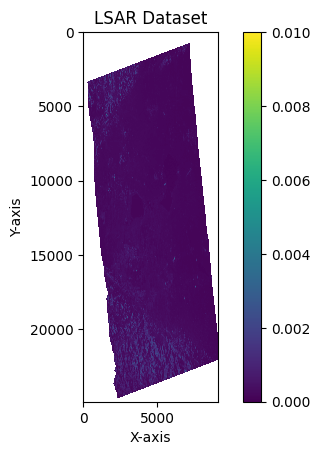

In [8]:
# Open the HDF5 file in read mode
with h5py.File('NISAR_L2_PR_GSLC_001_005_A_219_2005_DHDH_A_20081127T060959_20081127T061015_P01101_F_N_J_001.h5', 'r') as file:
    # Access the 'science/LSAR' group
    lsar_group = file['science/LSAR/GSLC/grids/frequencyA']

    # List all datasets within the LSAR group
    print("\nDatasets in LSAR group:")
    print(list(lsar_group.keys()))

    # Access a specific dataset within the LSAR group
    dataset = lsar_group['HH']
    print(dataset)

    # Read the data from the dataset
    data = dataset[:]  # This will load the entire dataset into memory
    print("Data shape:", data.shape)

    # Plot the phase data
    plt.imshow(np.angle(data), cmap='viridis', vmin=0, vmax=0.1)  # Assuming data is 2D
    plt.colorbar()
    plt.title('L2 GSLC HH Phase')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

    # Plot the magnitude data
    plt.imshow(np.abs(data), cmap='viridis', vmin=0.00, vmax=0.01)  # Assuming data is 2D
    plt.colorbar()
    plt.title('L2 GSLC HH Magnitude')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# 3. L2 GUNW 	Level 2 phase-unwrapped interferogram in geocoded coordinates


Datasets in LSAR group:
['coherenceMagnitude', 'connectedComponents', 'ionospherePhaseScreen', 'ionospherePhaseScreenUncertainty', 'projection', 'unwrappedPhase', 'xCoordinateSpacing', 'xCoordinates', 'yCoordinateSpacing', 'yCoordinates']
<HDF5 dataset "unwrappedPhase": shape (1555, 1137), type "<f4">
Data shape: (1555, 1137)


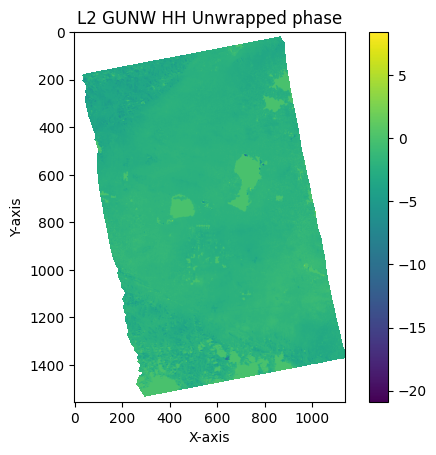


Datasets in LSAR group:
['coherenceMagnitude', 'projection', 'wrappedInterferogram', 'xCoordinateSpacing', 'xCoordinates', 'yCoordinateSpacing', 'yCoordinates']
<HDF5 dataset "wrappedInterferogram": shape (6220, 4545), type "<c8">
Data shape: (6220, 4545)


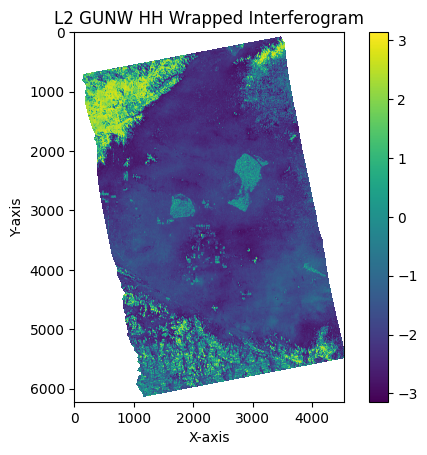

In [23]:
# Open the HDF5 file in read mode
with h5py.File('NISAR_L2_PR_GUNW_001_005_A_219_220_4020_SH_20081012T060910_20081012T060926_20081127T060959_20081127T061015_P01101_M_F_J_001.h5', 'r') as file:
    # Access the 'science/LSAR' group
    lsar_group = file['science/LSAR/GUNW/grids/frequencyA/unwrappedInterferogram/HH'] #wrappedInteferogram

    # List all datasets within the LSAR group
    print("\nDatasets in LSAR group:")
    print(list(lsar_group.keys()))

    # Access a specific dataset within the LSAR group
    dataset = lsar_group['unwrappedPhase']
    print(dataset)

    # Read the data from the dataset
    data = dataset[:]  # This will load the entire dataset into memory
    print("Data shape:", data.shape)

    # Plot the unwrapped phase data
    plt.imshow(data, cmap='viridis')
    plt.colorbar()
    plt.title('L2 GUNW HH Unwrapped phase')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

    lsar_group = file['science/LSAR/GUNW/grids/frequencyA/wrappedInterferogram/HH'] #wrappedInteferogram

    # List all datasets within the LSAR group
    print("\nDatasets in LSAR group:")
    print(list(lsar_group.keys()))

    # Access a specific dataset within the LSAR group
    dataset = lsar_group['wrappedInterferogram']
    print(dataset)

    # Read the data from the dataset
    data = dataset[:]  # This will load the entire dataset into memory
    print("Data shape:", data.shape)

    # Plot the Wrapped Interferogram
    plt.imshow(np.angle(data), cmap='viridis') # Assuming data is 2D
    plt.colorbar()
    plt.title('L2 GUNW HH Wrapped Interferogram')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# 4. L2 GOFF Level 2 pixel offsets in geocoded coordinates

In [36]:
# Open the HDF5 file in read mode
with h5py.File('NISAR_L2_PR_GOFF_001_005_A_219_220_4020_SH_20081012T060910_20081012T060926_20081127T060959_20081127T061015_P01101_M_F_J_001.h5', 'r') as file:
    # Access the 'science/LSAR' group
    lsar_group = file['science/LSAR/GOFF/grids/frequencyA/pixelOffsets/HH/layer1']

    # List all datasets within the LSAR group
    print("\nDatasets in LSAR group:")
    print(list(lsar_group.keys()))



Datasets in LSAR group:
['alongTrackOffset', 'alongTrackOffsetVariance', 'correlationSurfacePeak', 'crossOffsetVariance', 'projection', 'slantRangeOffset', 'slantRangeOffsetVariance', 'snr', 'xCoordinateSpacing', 'xCoordinates', 'yCoordinateSpacing', 'yCoordinates']


# 5. L2 GCOV Level 2 SAR covariance product in geocoded coordinates


Datasets in LSAR group:
['HHHH', 'azimuthBandwidth', 'centerFrequency', 'listOfCovarianceTerms', 'listOfPolarizations', 'numberOfLooks', 'numberOfSubSwaths', 'projection', 'radiometricTerrainCorrectionFlag', 'rangeBandwidth', 'rtcAreaNormalizationFactorGamma0ToSigma0', 'slantRangeSpacing', 'xCoordinateSpacing', 'xCoordinates', 'yCoordinateSpacing', 'yCoordinates', 'zeroDopplerTimeSpacing']
<HDF5 dataset "HHHH": shape (6220, 4545), type "<f4">
Data shape: (6220, 4545)


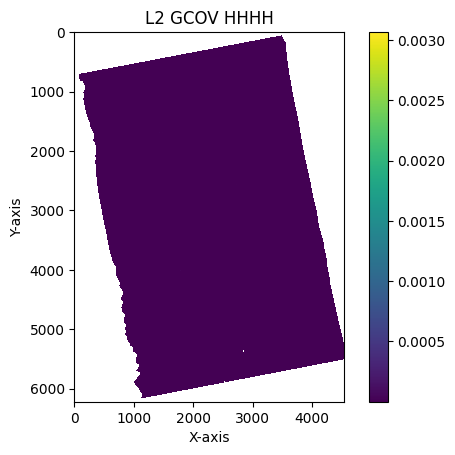

In [41]:
# Open the HDF5 file in read mode
with h5py.File('NISAR_L2_PR_GCOV_001_005_A_219_4020_SHNA_A_20081012T060910_20081012T060926_P01101_F_N_J_001.h5', 'r') as file:
    # Access the 'science/LSAR' group
    lsar_group = file['science/LSAR/GCOV/grids/frequencyA/']

    # List all datasets within the LSAR group
    print("\nDatasets in LSAR group:")
    print(list(lsar_group.keys()))

    # Access a specific dataset within the LSAR group
    dataset = lsar_group['HHHH']
    print(dataset)

    # Read the data from the dataset
    data = dataset[:]  # This will load the entire dataset into memory
    print("Data shape:", data.shape)

    # Plot the unwrapped phase data
    plt.imshow(data, cmap='viridis')
    plt.colorbar()
    plt.title('L2 GCOV HHHH')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

# 6. L3 SM Level 3 Global Soil Moisture Product

DSG, PMI, TSR soil moisture algorithms

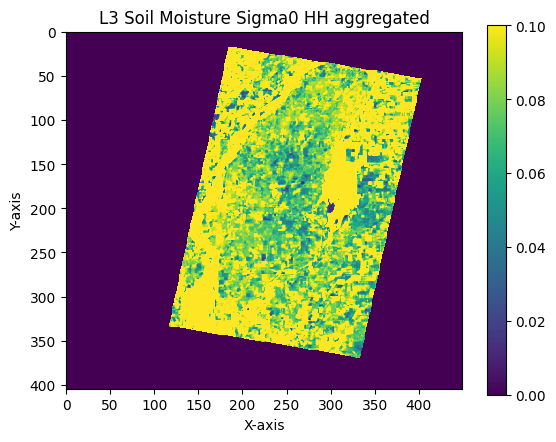

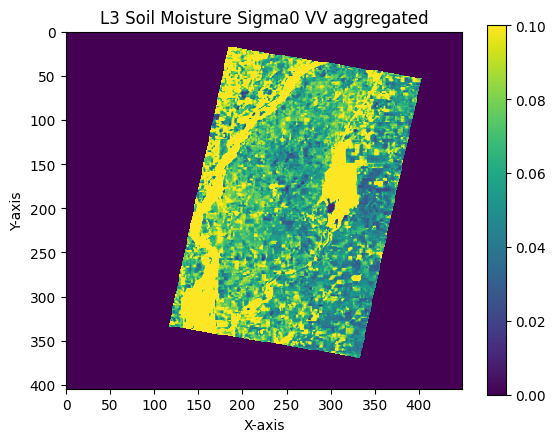

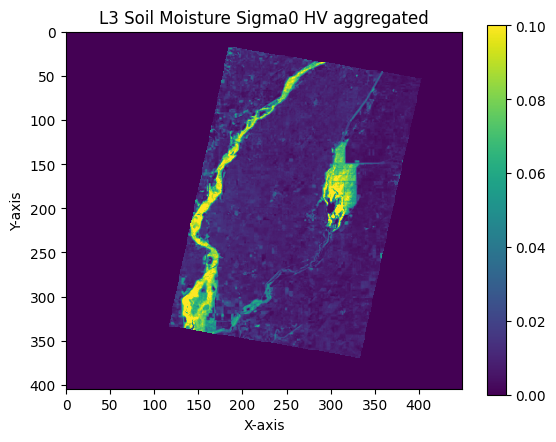

In [52]:
# Open the HDF5 file in read mode
with h5py.File('NISAR_L3_PR_SME2_001_008_D_070_4000_QPNA_A_20190829T180759_20190829T180809_P01101_M_P_J_001.h5', 'r') as file:
    # Access the 'science/LSAR' group
    lsar_group_hh = file['Sigma0_hh_aggregated']
    lsar_group_vv = file['Sigma0_vv_aggregated']
    lsar_group_hv = file['Sigma0_hv_aggregated']

    # Plot the unwrapped phase data
    plt.imshow(lsar_group_hh, vmin=0, vmax=0.1, cmap='viridis')
    plt.colorbar()
    plt.title('L3 Soil Moisture Sigma0 HH aggregated')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

    # Plot the unwrapped phase data
    plt.imshow(lsar_group_vv, vmin=0, vmax=0.1, cmap='viridis')
    plt.colorbar()
    plt.title('L3 Soil Moisture Sigma0 VV aggregated')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

    # Plot the unwrapped phase data
    plt.imshow(lsar_group_hv, vmin=0, vmax=0.1, cmap='viridis')
    plt.colorbar()
    plt.title('L3 Soil Moisture Sigma0 HV aggregated')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()


Datasets in LSAR group:
['DSG', 'PMI', 'TSR']


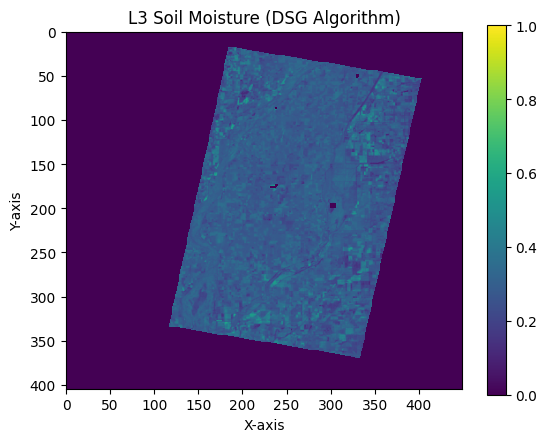

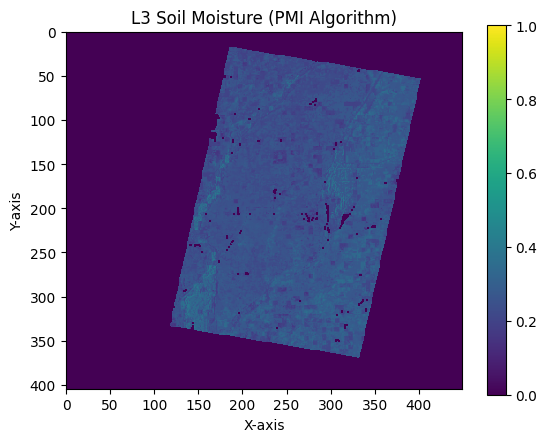

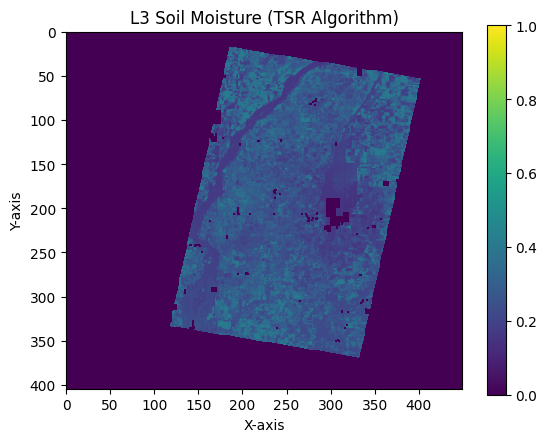

In [63]:
# Open the HDF5 file in read mode
with h5py.File('NISAR_L3_PR_SME2_001_008_D_070_4000_QPNA_A_20190829T180759_20190829T180809_P01101_M_P_J_001.h5', 'r') as file:
    # Access the 'science/LSAR' group
    lsar_group = file['/Algorithm/']

    # List all datasets within the LSAR group
    print("\nDatasets in LSAR group:")
    print(list(lsar_group.keys()))

    # Access a specific dataset within the LSAR group
    dataset_dsg = lsar_group['DSG/Soil_moisture']
    dataset_pmi = lsar_group['PMI/Soil_moisture']
    dataset_tsr = lsar_group['TSR/Soil_moisture']

    # Read the data from the dataset
    data_dsg = dataset_dsg[:]
    data_pmi = dataset_pmi[:]
    data_tsr = dataset_tsr[:]

    # Plot the unwrapped phase data
    plt.imshow(data_dsg, vmin=0, vmax=1, cmap='viridis')
    plt.colorbar()
    plt.title('L3 Soil Moisture (DSG Algorithm)')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

    plt.imshow(data_pmi, vmin=0, vmax=1, cmap='viridis')
    plt.colorbar()
    plt.title('L3 Soil Moisture (PMI Algorithm)')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

    plt.imshow(data_tsr, vmin=0, vmax=1, cmap='viridis')
    plt.colorbar()
    plt.title('L3 Soil Moisture (TSR Algorithm)')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()

## Other Resources



## References



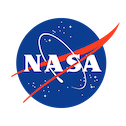

The research was carried out at the Jet Propulsion Laboratory, California Institute of Technology, under a contract with the National Aeronautics and Space Administration (80NM0018D0004)

© 2024. California Institute of Technology. Government sponsorship acknowledged.